In [ ]:
import pandas as pd
import re
import string
from transformers import pipeline

In [4]:
hanifnoerr = "hanifnoerr/Fine-tuned-Indonesian-Sentiment-Classifier"
hanifnoerr_model = pipeline(
    "sentiment-analysis",
    model=hanifnoerr,
    tokenizer=hanifnoerr,
    truncation=True,
     max_length=512
)
def analyze_sentiment_hanifnoerr(text):
    try:
        result = hanifnoerr_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

crypter70 = "crypter70/IndoBERT-Sentiment-Analysis"
crypter70_model = pipeline(
    "sentiment-analysis",
    model=crypter70,
    tokenizer=crypter70,
    truncation=True,
     max_length=512
)
def analyze_sentiment_crypter70(text):
    try:
        result = crypter70_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

w11wo = "w11wo/indonesian-roberta-base-sentiment-classifier"
w11wo_model = pipeline(
    "sentiment-analysis",
    model=w11wo,
    tokenizer=w11wo,
    truncation=True,
     max_length=512
)
def analyze_sentiment_w11wo(text):
    try:
        result = w11wo_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

ayameRushia = "ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"
ayameRushia_model = pipeline(
    "sentiment-analysis",
    model=ayameRushia,
    tokenizer=ayameRushia,
    truncation=True,
     max_length=512
)
def analyze_sentiment_ayameRushia(text):
    try:
        result = ayameRushia_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

Aardiiiiy = "Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis"
Aardiiiiy_model = pipeline(
    "sentiment-analysis",
    model=Aardiiiiy,
    tokenizer=Aardiiiiy,
    truncation=True,
     max_length=512
)
def analyze_sentiment_Aardiiiiy(text):
    try:
        result = Aardiiiiy_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu


CLEANING

In [5]:
data = pd.read_csv("Review KCU Pulau Jawa.csv")  # Load the CSV file into a DataFrame

data = data.dropna(subset=['review_text'])  # Drop rows where 'review_text' is missing
data['review_text_cleaned'] = data['review_text'].astype(str).str.lower()  # Convert to string and lowercase
data['review_text_cleaned'] = [re.sub(r'[^\x00-\x7f]',r'', i) for i in data['review_text_cleaned']]  # Remove non-ASCII characters
data['review_text_cleaned'] = [re.sub(r'\n', r' ', i) for i in data['review_text_cleaned']]  # Replace newline characters with spaces
data['review_text_cleaned'] = data['review_text_cleaned'].apply(
    lambda x: re.sub(f"[{re.escape(string.punctuation)}]", " ", x)  # Remove punctuation
)
data['review_text_cleaned'] = data['review_text_cleaned'].apply(lambda x: re.sub(r'\d+', '', x))  # Remove numbers
data['review_text_cleaned'] = data['review_text_cleaned'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())  # Normalize whitespace
data = data[data['review_text_cleaned'] != ""]  # Remove rows where cleaned text is empty

In [6]:
# Load dan buat dict typo
df_typo = pd.read_csv("list typo.csv").astype(str)

# Hapus jika key == value
df_typo = df_typo[df_typo.iloc[:, 0].str.strip() != df_typo.iloc[:, 1].str.strip()]

# Hapus duplikat value (jika dua key punya value sama, simpan satu saja)
seen_values = set()
filtered_rows = []
for _, row in df_typo.iterrows():
    key = row[0].strip()
    val = row[1].strip()
    if val not in seen_values:
        seen_values.add(val)
        filtered_rows.append((key, val))

typo_dict = dict(filtered_rows)

# Revisi kalimat
data['review_text_cleaned'] = data['review_text_cleaned'].apply(
    lambda x: ' '.join([typo_dict.get(word, word) for word in x.split()])
)

C:\Users\POS\AppData\Local\Temp\ipykernel_16560\2623600933.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  key = row[0].strip()
C:\Users\POS\AppData\Local\Temp\ipykernel_16560\2623600933.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = row[1].strip()


HANIFNOERR

In [7]:
data[['sentiment_result_hanifnoerr', 'score_sentiment_result_hanifnoerr']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_hanifnoerr(x))
)
print(data['sentiment_result_hanifnoerr'].value_counts())

sentiment_result_hanifnoerr
positive    2494
negative    1814
neutral      664
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_16560\1922892403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_hanifnoerr', order=data['sentiment_result_hanifnoerr'].value_counts().index, palette='pastel')


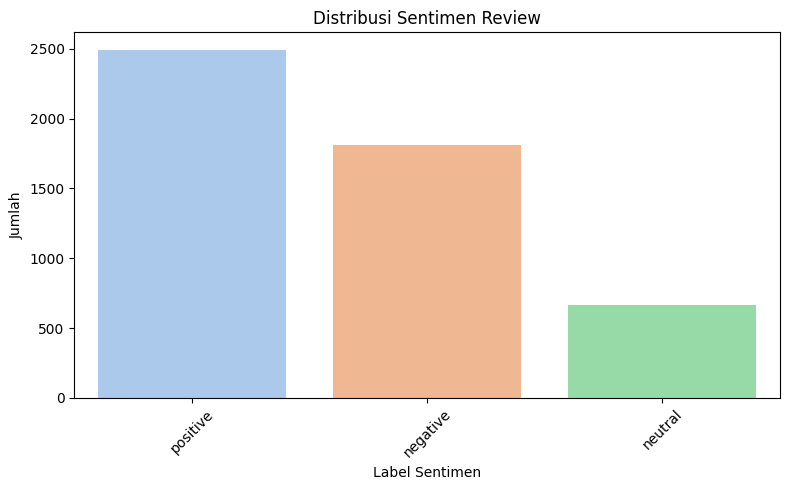

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_hanifnoerr', order=data['sentiment_result_hanifnoerr'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

crypter70

In [9]:
data[['sentiment_result_crypter70', 'score_sentiment_result_crypter70']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_crypter70(x))
)
print(data['sentiment_result_crypter70'].value_counts())

sentiment_result_crypter70
POSITIVE    2431
NEGATIVE    1733
NEUTRAL      808
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_16560\3126681369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_crypter70', order=data['sentiment_result_crypter70'].value_counts().index, palette='pastel')


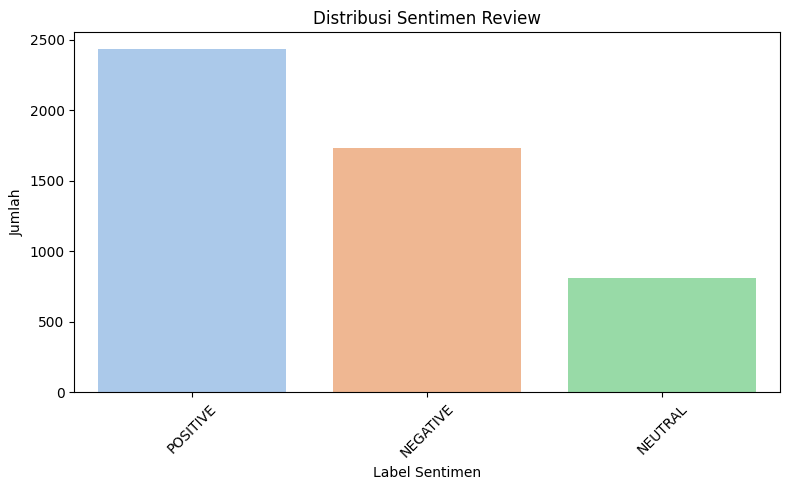

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_crypter70', order=data['sentiment_result_crypter70'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

w11wo

In [11]:
data[['sentiment_result_w11wo', 'score_sentiment_result_w11wo']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_w11wo(x))
)
print(data['sentiment_result_w11wo'].value_counts())

sentiment_result_w11wo
positive    2446
negative    1720
neutral      806
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_16560\392182998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_w11wo', order=data['sentiment_result_w11wo'].value_counts().index, palette='pastel')


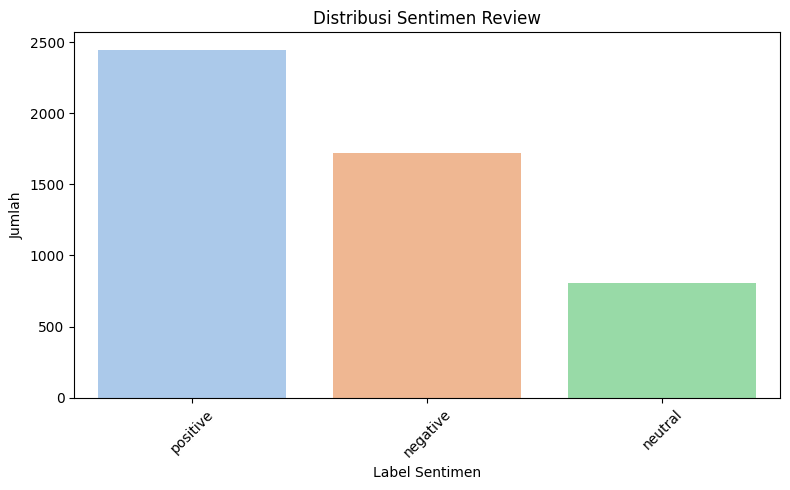

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_w11wo', order=data['sentiment_result_w11wo'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
data[['sentiment_result_ayameRushia', 'score_sentiment_result_ayameRushia']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_ayameRushia(x))
)
print(data['sentiment_result_ayameRushia'].value_counts())

sentiment_result_ayameRushia
Positive    2212
Negative    1649
Neutral     1111
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_16560\4168932491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_ayameRushia', order=data['sentiment_result_ayameRushia'].value_counts().index, palette='pastel')


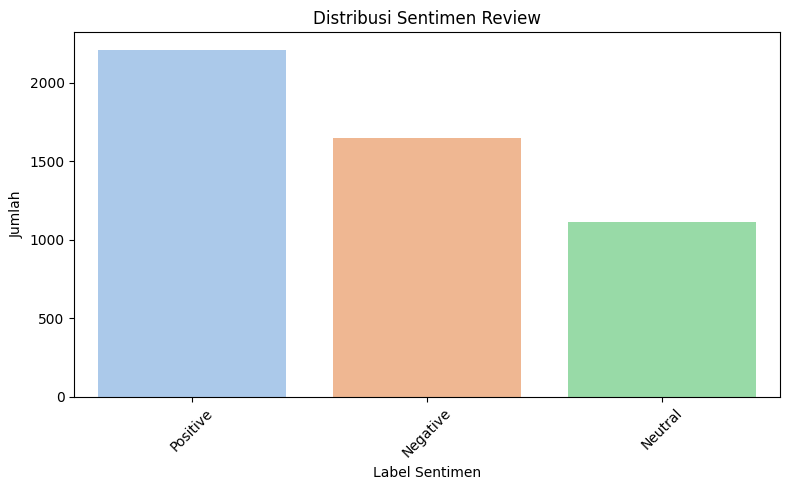

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_ayameRushia', order=data['sentiment_result_ayameRushia'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
data[['sentiment_result_Aardiiiiy', 'score_sentiment_result_Aardiiiiy']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_Aardiiiiy(x))
)
print(data['sentiment_result_Aardiiiiy'].value_counts())

sentiment_result_Aardiiiiy
Negative    1807
Positive    1675
Neutral     1490
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_16560\331142182.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_Aardiiiiy', order=data['sentiment_result_Aardiiiiy'].value_counts().index, palette='pastel')


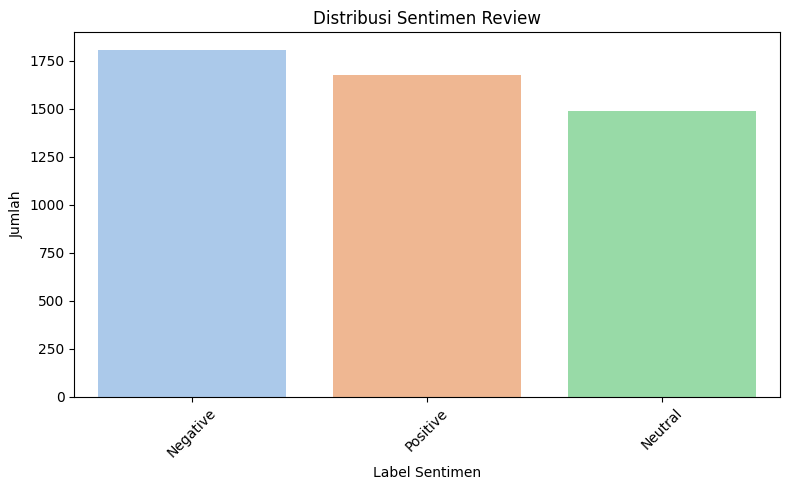

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_Aardiiiiy', order=data['sentiment_result_Aardiiiiy'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
data['sentiment_result_hanifnoerr'] = data['sentiment_result_hanifnoerr'].str.lower()
data['sentiment_result_crypter70'] = data['sentiment_result_crypter70'].str.lower()
data['sentiment_result_w11wo'] = data['sentiment_result_w11wo'].str.lower()
data['sentiment_result_ayameRushia'] = data['sentiment_result_ayameRushia'].str.lower()
data['sentiment_result_Aardiiiiy'] = data['sentiment_result_Aardiiiiy'].str.lower()

In [19]:
def get_group_label_with_highest_score(row):
    label_scores = {}

    for label_col, score_col in [
        ('sentiment_result_hanifnoerr', 'score_sentiment_result_hanifnoerr'),
        ('sentiment_result_crypter70', 'score_sentiment_result_crypter70'),
        ('sentiment_result_w11wo', 'score_sentiment_result_w11wo'),
        ('sentiment_result_ayameRushia', 'score_sentiment_result_ayameRushia'),
        ('sentiment_result_Aardiiiiy', 'score_sentiment_result_Aardiiiiy')
    ]:
        label = str(row[label_col]).lower()
        score = row[score_col]

        if label in label_scores:
            label_scores[label] += score
        else:
            label_scores[label] = score

    return max(label_scores, key=label_scores.get)

# Terapkan
data['fix_sentiment'] = data.apply(get_group_label_with_highest_score, axis=1)
data['fix_sentiment'].value_counts()

fix_sentiment
positive    2396
negative    1764
neutral      812
Name: count, dtype: int64

In [20]:
def get_label_with_highest_score(row):
    max_score = -float('inf')
    best_label = None

    for label_col, score_col in [
        ('sentiment_result_hanifnoerr', 'score_sentiment_result_hanifnoerr'),
        ('sentiment_result_crypter70', 'score_sentiment_result_crypter70'),
        ('sentiment_result_w11wo', 'score_sentiment_result_w11wo'),
        ('sentiment_result_ayameRushia', 'score_sentiment_result_ayameRushia'),
        ('sentiment_result_Aardiiiiy', 'score_sentiment_result_Aardiiiiy')
    ]:
        label = str(row[label_col]).lower()
        score = row[score_col]

        if score > max_score:
            max_score = score
            best_label = label

    return best_label

# Terapkan
data['fix_sentiment'] = data.apply(get_label_with_highest_score, axis=1)

data['fix_sentiment'].value_counts()

fix_sentiment
positive    2407
negative    1777
neutral      788
Name: count, dtype: int64